###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY.

# Фугоидные колебания

С возвращением! Это второй блокнот модуля _“Фугоидная модель полета планера”_, первого учебного модуля русской версии курса  [**"Practical Numerical Methods with Python."**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about)

В первом ноутбуке, _“Фугоидное движение”_, была описана физика полета летательного аппарата по колебательной траектории. Такое движение можно преставить как перераспределение эненргии между ее кинетической и потенциальной формами. Это описание отсылает нас к Фредерику Ланчестеру и его труду “Аэродонетика” 1909 года, посвященному вопросам аэроусточивости. Мы завершили наше знакомство с этой задачей построением траекторий движения самолета, полученным согласно анализу Ланчестера, и именно эти траектории называются _фугоидами_. 

Рассмотрим ситуацию, когда самолет, движущийся по начальной прямолинейной траекториии (фугоид, получающийся при значениях параметров $C=2/3$, $\cos\theta=1$, и $z = z_t$), испытывает небольшое возмущение, например порыв ветра. В результате он начнет совершать плавные колебания относительно первоначального направления движения -- _фугоидные колебания_.

Допустим, что ускорение самолета направлено вверх $-d^2z/dt^2$, и что возмущение мало - угол траектории меняется слабо и $\cos\theta = 1$, то второй закон Ньютона можно записать в виде

$$\begin{equation}
L - W = - \frac{W}{g}\frac{d^2 z}{dt^2}
\end{equation}$$

В предыдущем блокноте мы вывели следующее соотношение между весом и подъемной силой через триммерную скорость 
 $v_t$:

$$\begin{equation}
\frac{L}{W}=\frac{v^2}{v_t^2}
\end{equation}$$

Оно нам еще пригодится: если поделить уравнение (1) на вес, то можно заменить $L/W$ соотношением (2). Второе ценное соотношение из предыдущего ноутбука -- закон сохранения энергии для единицы массы $v^2 = 2 gz$. Используя их, уравенение (1) можно записать в виде:

$$\begin{equation}
\frac{d^2z}{dt^2} + \frac{gz}{z_t} = g
\end{equation}$$

Что напоминает нам уравнение (3)?

Если курс по физике еще не целиком вылетел из головы, то пытливый исследователь увидит в этом уравнении _закон гармонических колнбаний_.

Хрестоматийном случай --  груз на пружине. Закон Гука для пружины $F=-kx$, где $F$ -- сила растяжения (сжатия), $x$ -- смещение относительно равновесного положения, а $k$ -- коэффициент упругости (или жёсткости). Уравнение второго закона Ньютона:

$$\begin{equation}
 \frac{d^2 x}{dt^2}= -\frac{k}{m}x
\end{equation}$$

иммеет решение $x(t) = A \cos(\omega t- \phi)$, описывающее простые гармонические колебания с частотой $\omega=\sqrt{k/m}=2\pi f$ и фазой $\phi$.

Теперь вернемся к уравнению (3): оно выглядит в так же и тоже описывает простые гармонические колебания с частотой $\omega=\sqrt{g/z_t}$ относительно средней высоты $z_t$. 


Кроме того, можно определить и период колебаний: $2 \pi \sqrt{z_t/g}$, или, если выразить его через скорость: $\pi \sqrt{2} v_t/g$.

_Это, вообще говоря, ценный результат!_ Не имея никакой информации о  летательном аппарате и высоте его полета, мы смогли опрелить период фугоидных колебаний в виде зависимости от триммерной скорости. Например, если триммерная скорость равна 200 узлам (примерно 370 $км/ч$), период колебаний получается равным 47 секундам -- такие колебания достаточно сложно заметить в реальности. 

Теперь нужно нарисовать траектории движения самолета для данного начального возмущения. Для этого мы численно проинтегрируем уравнение движения.

## Готовимся интегрировать

Уравнение фугоида -- обыкновенное дифференциальное уравнение (ОДУ) второго порядка. Перепишем его в виде:

$$\begin{equation}
z(t)'' + \frac{g \,z(t)}{z_t}=g
\end{equation}$$

Распространенный прием работы с ОДУ -- представить уравнение 2-го порядка в виде системы уравнений 1-го порядка. В нашем случае:

$$\begin{eqnarray}
z'(t) &=& b(t)\\
b'(t) &=& g\left(1-\frac{z(t)}{z_t}\right)
\end{eqnarray}$$

Для лучшего понимания происходящего выкладки стоит повторить на бумаге.

Теперь запишем эту систему в векторном виде. Введя вектор независмых переменных:

$$\begin{equation}
\vec{u}  = \begin{pmatrix} z \\ b \end{pmatrix}
\end{equation}$$,

всю систему можно записать в виде одного векторного уравнения:

\begin{equation}
\vec{u}'(t)  = \begin{pmatrix} b\\ g-g\frac{z(t)}{z_t} \end{pmatrix}
\end{equation}

Если правую часть обозначить как $\vec{f}(\vec{u})$, то уравнение станет совсем коротким: $\vec{u}'(t) = \vec{f}(\vec{u})$. Можно опустить знаки стрелочек над векторами для удобства. Но при этом нужно помнить, что $u$ и $f$ -- вектора в урвынении движения фугоида.

Теперь все готово для численного решения задачи.

## Задача Коши

Остановимся на секунду в нашем стремлении все проинтегрировать. Предположим, что у нас имеется ОДУ первого порядка $u'=f(u)$. Известно, что если его проинтегрировать, возникнет произвольная константа интегрирования. Для того, чтобы определить ее значение, нужно знать точку на кривой $(t, u)$. Если в ОДУ записана прозводная по времени, то такая точка называется _начальным условием_ и записывается в виде

$$u(t=0)=u_0$$

Как мы убедились, ОДУ второго порядка может быть записано как система ОДУ первого порядка, тогда нам нужно иметь начальные условия для каждого из уравнений системы -- два начальных условия для определения постоянных интегрирования. То же самое можно сказать для ОДУ более высоких порядков: для проядка $n$ можно записать систему из $n$ уравнений и использовать $n$ начальных условий. Если такой набор данных присутствует, то можно говорить, что сформулирована _задача Коши_.

Как известно из определения производной, значение производной в точке означает наклон касательной к кривой $u=u(t)$:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

Если шаг по времени $\Delta t$ достаточно мал, можно _аппроксимировать_ производную, отбросив предел:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

Используя это уравнение, зная значение  $u'(t)=f(u)$ и начальные условия, мы можем шагнуть на $\Delta t$ и опрелить значение функции $u(t+\Delta t)$. Затем мы можем повторить эту процедуру и, используя найденные значения, опредедить $u(t+2\Delta t)$, и так далее. Так мы _делаем шаг по вермени_, численно определяя решение в серии моментов времени $t_1, t_2, t_3 \cdots$, каждый из которых отстоит от предыдущего на $\Delta t$. Численное решение ОДУ в итоге представляется в виде таблицы значений $t_i, u_i$.

## Дискретизация

Для того, чтобы выполнить процедуру, описанную выше, и найти численное решение ОДУ, нужно начать с определеня значений $t_1,t_2,t_3 \cdots t_n$ -- назовем их временной *сеткой*. Первая точка этой сетки задается _начальным усолвием_, разница между двумя последовательными моментами времени называется _шагом по времени_ и обозначается $\Delta t$. Решение в момент времени $t_n$ обозначается $u_n$.

Давайте построим временную сетку для нашей задачи. Сначала зададим конечный момент времени $T$ и шаг $\Delta t$. В коде для их обозначения будем использовать переменные `T` и `dt`. Имея эти значения, можно вычислить число шагов по времени, необходимых для того, чтобы достичь конечного момента времени; назовем эту переменную `N`.

Давайте уже кодить! Первым делом нужно импортировать необходимые библиотеки: NumPy для операций с векторами и модуль Pyplot из библиотеки Matplotlib для того, чтобы в последствии рисовать результаты. Строка `%matplotlib inline` нужна, чтобы отображать графики в ноктбуке.

In [4]:
import numpy 
from matplotlib import pyplot
%matplotlib inline

Теперь нужно инициализировать переменные `T` и `dt`, вычислить `N` и создать массив NumPy, содержащий значения моментов времени.

In [5]:
T = 100.0
dt = 0.02
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

Построили сетку! Пора применять процедуру, описанную в (10).

##### Задание!

* В коде в предыдущей ячейке используется функция `linspace()`. Попробуйте переписать его, используя функцию `arange()`. Если нужно, обратитесь к документации для справки по этим функциям.

##### Подсказка:

Если в ячейке кода набрать знак вопроса и имя функции, например `?numpy.linspace`, и выполнить ее, то вызовется панель с документацией.

## Метод Эйлера

Обозначим  $u_n$ аппроксимацию решения на временном шаге $t_n$. Для получения численного решения системы уравненй нужно произвести последовательность вычислений по формуле, основанной на (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

Это и есть **Метод Эйлера**.

В случае уравнений фугоидных колебаний метод Эйлера дает следующий алгоритм::

\begin{align}
z_{n+1} & = z_n + \Delta t \, b_n \\
b_{n+1} & = b_n + \Delta t \left(g - \frac{g}{z_t} \, z_n \right).
\end{align}

### Решаем!

Для того чтобы реализовать этод метод решения, нужно проделать следующие шаги: определить некоторые перменные, инициализировать массив, в котором будут храниться значения решения и еще один -- для текущих значений.

In [6]:
# initial conditions
z0 = 100.  #altitude
b0  = 10.  #upward velocity resulting from gust
zt = 100.
g  = 9.81

u = numpy.array([z0, b0])

# initialize an array to hold the changing elevation values
z = numpy.zeros(N)
z[0] = z0  

Нужно обратить внимание на несколько важных моментов:

1. Точка после чисел в определении переменных -- мы явным образом опрелеляем тип создаваемых переменных (хорошая привычка)
2. Массив `z` _создается_  и _инициализируется_ нулями. (Фукция `zeros()`)
3. В последней строке первому элементу массива решений приписывается _начальным условием_.

Теперь можно делать шаг по времени. Заметьте, что мы за одну итерацию мы определяем обе независимые переменные.

In [7]:
# time-loop using Euler's method
for n in range(1,N):
    u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
    z[n] = u[0]

Убедитесь, что вы понимаете, что тут запрограммировано. Шаблон численных методов -- итерации по времени в ходе которых на каждом шаге применяется численная схема.

## Рисуем решение

Если все верно, в массиве `z` хранятся положения планера в каждый момент времени. Давайте воспользуемся возможностями Matplotlib для визуализации траектории. 

В следующей ячейке мы задаем размер графика, пределы на вертикальной оси, а также формат подписей к осям. В последней строчке рисуется сам график вфбранным нами стилем (черная сплошная линия).

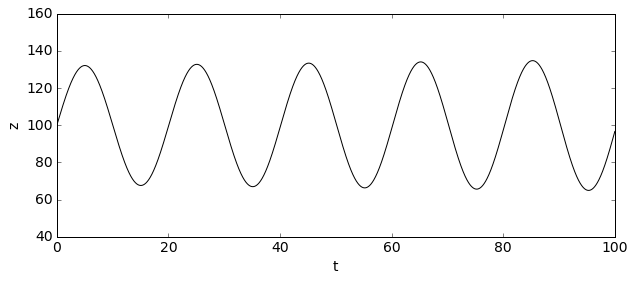

In [8]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z, 'k-');

##### Воросы

Попробуйте поменять начальные условия.  

* Что произойдет при более сильном порыве ветра?  
* При слабом?  
* При нулевом (`v = 0`)?

## Точное решение

Уравнение для гармонических колебаний, значит решение -- синус и косинус:

$$
\begin{equation}
z(t) = A \sin \left(\sqrt{\frac{g}{z_t}} t \right) + B \cos \left(\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation}
$$ 

Константы определяем из начальных условий:

$$\begin{eqnarray}
z(0) = z_0 \\
b(0) = b_0
\end{eqnarray}$$

После непродолжительных вычислений получим:

$$\begin{equation}
z(t) = b_0 \sqrt{\frac{z_t}{g}} \sin \left(\sqrt{\frac{g}{z_t}} t \right) + (z_0-z_t) \cos \left(\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation}$$

Все значения мы уже задали, можем сразу получть точное решение.

In [9]:
z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt

## Рисуем точное решение

Для того чтобы добавить еще одну кривую, нужно снова вызвать функцию `pyplot.plot()`. Кроме того можно добавить легенду:

```Python
pyplot.legend(["line 1","line 2"])
```

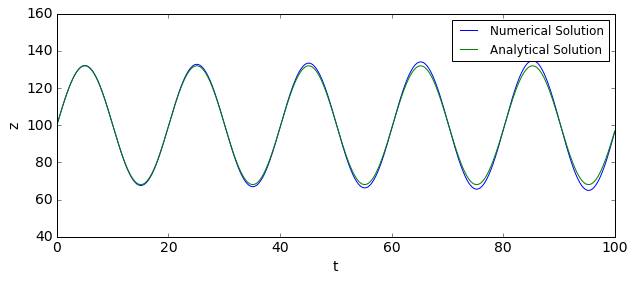

In [10]:
pyplot.figure(figsize=(10,4))
pyplot.ylim(40,160)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('z', fontsize=14) #y label
pyplot.plot(t,z)
pyplot.plot(t, z_exact)
pyplot.legend(['Numerical Solution','Analytical Solution']);

На первый взгляд аналитическое и численное решение совпадают хорошо, однако, можно заметить, что с ростом $t$ расхождение увеличивается. Точность метода. Если при уменьшениии величины шага $\Delta t$ численное решение (аппроксимация) приближается к точному, то метод обладает свойством сходимости. Если при $\Delta t\rightarrow 0$ ошибка аппроксимации стремится к нулю, то метод обладает свойством согласованности.

## Сходимость

Для корректного сравнения решений необходимо использовать какую-нибудь **норму**, например, норму $L_1$:

$$ E = \Delta t \sum_{n=0}^N \left|z(t_n) - z_n\right|,$$

что есть сумма разностей точного и численного решения в каждом узле сетки (с нормировочным множителем). Другими словами, $E$ это дискретная форма интеграла абсолютного значения разницы между вычисленным $z$ и точным $z_\rm{exact}$ решениями, взятого на интервале $T$:

$$ E = \int \vert z-z_\rm{exact}\vert dt $$

Проверяем наш метод с разными $\Delta t$ (dt).
Проверим сходимость, вычислив решения для последовательно уменьшающихся значений dt. У нас уже написан почти весь код, нужный для этого. Надо только добавить дополнительный цикл по разным значениям шага по времени $\Delta t$. 

Убедитесь, что вы понимаете, что происходит в следующей ячейке с кодом, возможно для этого придется посмотреть документацию по функции  [enumerate](https://docs.python.org/2/library/functions.html#enumerate).

#### Предупреждение

Для выполнения следующей ячейки с кодом может потребоваться некоторое время (только для вычислений с последним значением $\Delta t$ требуется миллион итераций!).  Если ячейка находится в процессе выполнения, она помечается как `In [*]`. По окончании вычислений, звездочка `*` в этой метке заменится числом.

In [11]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    N = int(T/dt)+1    # number of time-steps
    ### discretize the time using numpy.linspace() ###
    t = numpy.linspace(0.0, T, N)

    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop - Euler method
    for n in range(1,N):
        ### compute next solution using Euler method ###
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]   # store the elevation at time-step n+1
    
    z_values[i] = z.copy()    # store the total elevation calculation grid i

### Вычисляем ошибку

Теперь в массиве `z_values` хранятся численные решения для каждого шаго по времени $\Delta t$. Для определения ошибки, соответствующей каждому значению $\Delta t$, нужно написать еще одну функцию.

In [12]:
def get_error(z, dt):
    """Returns the error relative to analytical solution using L-1 norm.
    
    Parameters
    ----------
    z : array of float
        numerical solution.
    dt : float
        time increment.
        
    Returns
    -------
    err : float
        L_{1} norm of the error with respect to the exact solution.
    """
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0*(zt/g)**.5*numpy.sin((g/zt)**.5*t)+\
                (z0-zt)*numpy.cos((g/zt)**.5*t)+zt
    
    return dt * numpy.sum(numpy.abs(z-z_exact))

Теперь в цикле по $\Delta t$ вычислим ошибки.

In [13]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    ### call the function get_error() ###
    error_values[i] = get_error(z_values[i], dt)

Следует помнить, что численная ошибка *сходящегося* метода уменьшается с уменьшением шага по времени. Для визуализации этого свойства построим график в осях $\Delta t$ и числелнная ошибка. Если использовать для этого знакомую нам функцию `pyplot.plot`, результат будет не слишком наглядным. Вместо нее можно воспользоваться функцией `pyplot.loglog`, которая позволяет строить график в логарифмическом масштабе. Для оценки ошибок численных схем практически всегда используется такой способ построения графиков.

(0.0001, 0.10000000000000001, 0.10000000000000001, 1000.0)

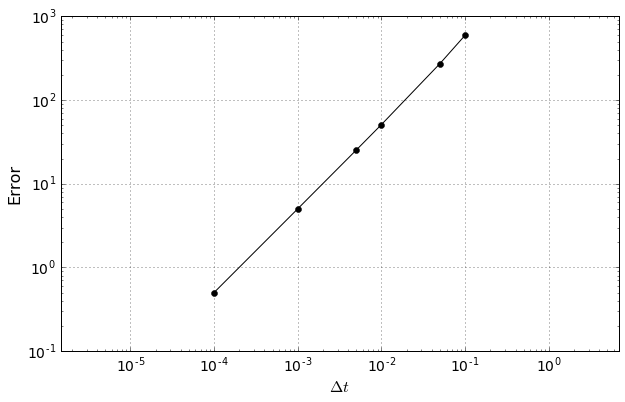

In [14]:
pyplot.figure(figsize=(10, 6))
pyplot.tick_params(axis='both', labelsize=14) #increase tick font size
pyplot.grid(True)                         #turn on grid lines
pyplot.xlabel('$\Delta t$', fontsize=16)  #x label
pyplot.ylabel('Error', fontsize=16)       #y label
pyplot.loglog(dt_values, error_values, 'ko-')  #log-log plot
pyplot.axis('equal')                      #make axes scale equally;

Смотришь на график --  глаз радуется! По мере того как убывает величина шага по времени (справа налево по горизонтальной оси), численная ошибка становится все меньше и меньше, как и следовало ожидать. 

### Задание

Для вычисления ошибки при различных шагах по времени мы использовали два вложенных цикла `for`. Это, как мы видели, работает, но желательно писать код, пригодный к повторному использованию с минимальной копипастой.

Напишите функцию, реализующую метод Эйлера, и перепешите ячейку с анализом ошибки численного решения с использованием созданной функции.

---

###### The cell below loads the style of this notebook.

In [16]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())